# Setting Up:

## Libraries:

In [19]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [200]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import re

import matplotlib.pylab as plt
import seaborn as sns
from ipywidgets import interact

import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [21]:
data = pd.read_csv('prepared_data.csv')
print('Rows: {}\nColumns: {}'.format(data.shape[0], data.shape[1]))

Rows: 1733108
Columns: 53


In [22]:
cols = data.columns
r = re.compile("diff_rating|diff_score.*")
cols_drop = list(filter(r.match, cols)) + ['match_id', 'current_time',
                                           'timestamp',
                                           'player_1_wins']

data1 = data.drop(cols_drop, axis=1)

@interact
def match_plots(match=list(data.match_id.unique()),
                column=list(data1.columns)):         
    
    match_data_df = data.loc[data['match_id'] == match]
    plt.figure(figsize=(12,6))
    sns.lineplot(x="timestamp", y=column, data=match_data_df)
    plt.title("Column '{}' Through Match Time".format(column))
    
    if match_data_df.player_1_wins.mean() == 1:
        print(' Player 1 won')
    else:
        print(' Player 1 lost')

interactive(children=(Dropdown(description='match', options=(16720609, 16720612, 16720613, 16720615, 16720616,…

## Ploting most important features:

In [38]:
impfeat = data[['match_id', 'timestamp','player_1_wins',
              'diff_total_resources_food', 'diff_population_total',
              'diff_total_resources_wood', 'diff_percent_explored',
              'diff_population_civilian']]

impfeat.head()

,match_id,timestamp,player_1_wins,diff_total_resources_food,diff_population_total,diff_total_resources_wood,diff_percent_explored,diff_population_civilian
0,16720609,0,0,0,0,0,0,0
1,16720609,1,0,0,0,0,0,0
2,16720609,2,0,0,0,0,0,0
3,16720609,3,0,0,0,0,0,0
4,16720609,4,0,0,0,0,0,0


In [24]:
@interact
def match_plots(match=list(impfeat.match_id.unique())):   
    
    # Selecting match
    match_data_df = impfeat.loc[impfeat['match_id'] == match]
    
    # Scaling
    scaler = MinMaxScaler(feature_range=(-1, 1))
    cols = ['diff_total_resources_food',
       'diff_population_total', 'diff_total_resources_wood',
       'diff_percent_explored', 'diff_population_civilian']
    match_data_df[cols] = scaler.fit_transform(match_data_df[cols])

    # Ploting
    plt.figure(figsize=(12,6))
    plt.plot( 'timestamp', 'diff_total_resources_food', data=match_data_df, 
             color='r')
    plt.plot( 'timestamp', 'diff_population_total', data=match_data_df,
             color='b')
    plt.plot( 'timestamp', 'diff_total_resources_wood', data=match_data_df,
             color='g')
    plt.plot( 'timestamp', 'diff_percent_explored', data=match_data_df,
             color='orange')
    plt.plot( 'timestamp', 'diff_population_civilian', data=match_data_df,
             color='grey')
    plt.title('Most important features')
    plt.legend()
    
    if match_data_df.player_1_wins.mean() == 1:
        print(' Player 1 won')
    else:
        print(' Player 1 lost')

interactive(children=(Dropdown(description='match', options=(16720609, 16720612, 16720613, 16720615, 16720616,…

In [25]:
data.head() 

,match_id,current_time,timestamp,diff_units_infantry,diff_units_ranged,diff_units_siege,diff_units_war_ships,diff_units_cavalry_archers,diff_units_cavalry,diff_units_monks,...,diff_castles,diff_score_military,diff_score_economy,diff_score_technology,diff_score_society,diff_score_total,diff_kills,diff_razes,player_1_wins,diff_rating
0,16720609,0,0,-1,0,0,0,0,1,0,...,0,0,2,0,0,2,0,0,0,43
1,16720609,3,1,-1,0,0,0,0,1,0,...,0,0,2,0,0,2,0,0,0,43
2,16720609,6,2,-1,0,0,0,0,1,0,...,0,0,22,0,0,22,0,0,0,43
3,16720609,9,3,-1,0,0,0,0,1,0,...,0,0,25,0,0,25,0,0,0,43
4,16720609,12,4,-1,0,0,0,0,1,0,...,0,0,28,0,0,28,0,0,0,43


In [186]:
impfeat = data[['match_id', 'current_time','player_1_wins',
              'diff_total_resources_food', 'diff_population_total',
              'diff_total_resources_wood', 'diff_percent_explored',
              'diff_population_civilian']]

match_1672609 = impfeat.loc[impfeat['match_id'] == 16720609]
match_1672609.head()

,match_id,current_time,player_1_wins,diff_total_resources_food,diff_population_total,diff_total_resources_wood,diff_percent_explored,diff_population_civilian
0,16720609,0,0,0,0,0,0,0
1,16720609,3,0,0,0,0,0,0
2,16720609,6,0,0,0,0,0,0
3,16720609,9,0,0,0,0,0,0
4,16720609,12,0,0,0,0,0,0


In [187]:
match_1672609.shape

(1434, 8)

In [188]:
#format 'current_time' 
import datetime
match_1672609['current_time'] = match_1672609['current_time'].apply(lambda x: str(datetime.timedelta(seconds=x)))

In [189]:
#convert 'current_time' to datetime type
match_1672609['current_time'] = pd.to_datetime(match_1672609['current_time'])

In [190]:
# set 'current_time' as index
match_1672609 = match_1672609.set_index('current_time').drop('match_id', axis=1)
match_1672609.head(50)

,player_1_wins,diff_total_resources_food,diff_population_total,diff_total_resources_wood,diff_percent_explored,diff_population_civilian
current_time,,,,,,
2020-06-02 00:00:00,0,0,0,0,0,0
2020-06-02 00:00:03,0,0,0,0,0,0
2020-06-02 00:00:06,0,0,0,0,0,0
2020-06-02 00:00:09,0,0,0,0,0,0
2020-06-02 00:00:12,0,0,0,0,0,0
2020-06-02 00:00:15,0,0,0,0,0,0
2020-06-02 00:00:18,0,0,0,0,0,0
2020-06-02 00:00:22,0,0,0,0,0,0
2020-06-02 00:00:25,0,0,0,0,0,0


In [191]:
#check datatype of index
match_1672609.index

DatetimeIndex(['2020-06-02 00:00:00', '2020-06-02 00:00:03',
               '2020-06-02 00:00:06', '2020-06-02 00:00:09',
               '2020-06-02 00:00:12', '2020-06-02 00:00:15',
               '2020-06-02 00:00:18', '2020-06-02 00:00:22',
               '2020-06-02 00:00:25', '2020-06-02 00:00:28',
               ...
               '2020-06-02 01:11:46', '2020-06-02 01:11:49',
               '2020-06-02 01:11:52', '2020-06-02 01:11:55',
               '2020-06-02 01:11:58', '2020-06-02 01:12:01',
               '2020-06-02 01:12:04', '2020-06-02 01:12:07',
               '2020-06-02 01:12:10', '2020-06-02 01:12:13'],
              dtype='datetime64[ns]', name='current_time', length=1434, freq=None)

In [192]:
match_1672609.shape

(1434, 6)

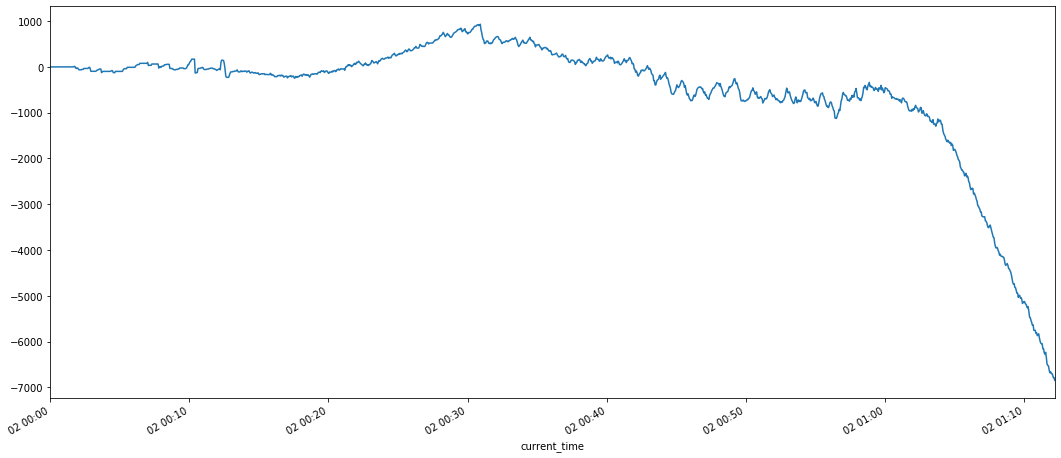

In [197]:
y = match_1672609.diff_total_resources_food
y.plot().plot(figsize=())
plt.show()

In [201]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasomod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])nal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [202]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:25045.19875640429
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:23337.886428155492
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:18926.543141427912
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:18739.26638288131
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:18158.253106119955
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:18071.266644883726
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:18688.716713778766
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:18038.605696155028
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:23095.940560478415
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:21416.880313474903
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:17332.630925329737
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:17176.49390813269
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:16753.206227859453
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:16632.847986387966
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:17174.47107051192
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:16649.317731564828
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:14367.60069916224
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:14258.5630997493

In [203]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9451      0.008   -117.595      0.000      -0.961      -0.929
ma.L1          1.0000      0.947      1.056      0.291      -0.856       2.856
ar.S.L12      -0.6046      0.015    -39.244      0.000      -0.635      -0.574
sigma2      1555.6545   1472.499      1.056      0.291   -1330.390    4441.699


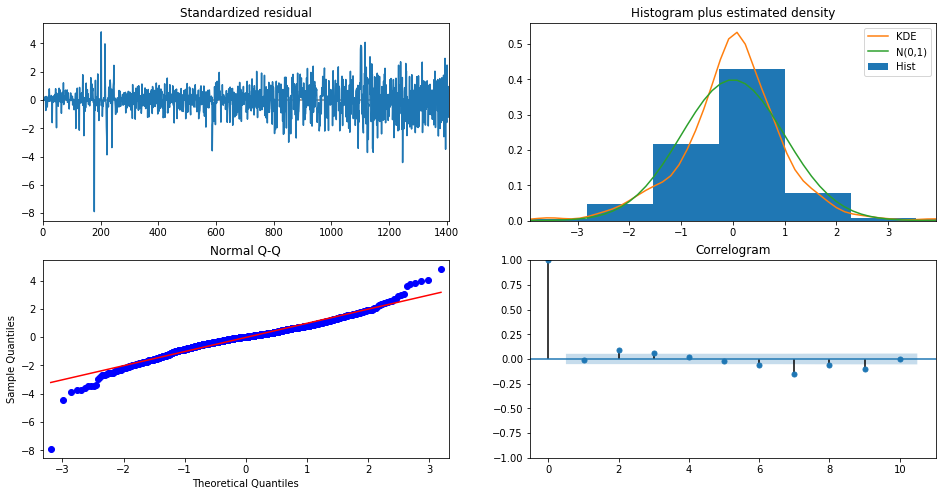

In [204]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

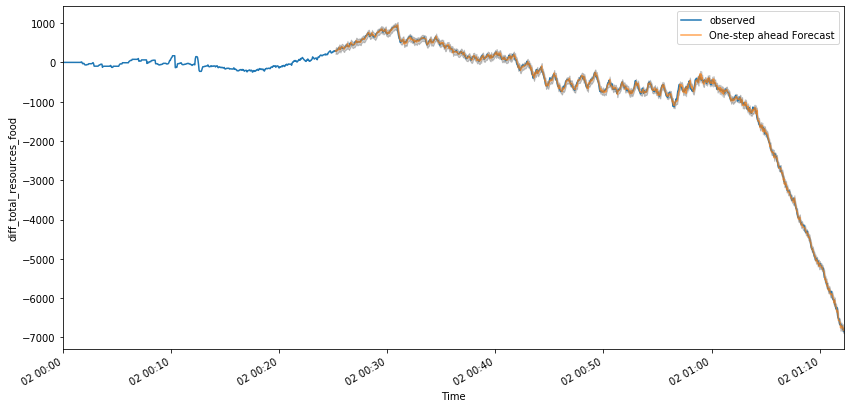

In [222]:
pred = results.get_prediction(start=pd.to_datetime('2020-06-02 00:25:14'), dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time')
ax.set_ylabel('diff_total_resources_food')
plt.legend()

plt.show()

In [220]:
pd.set_option('display.max_rows', 500)
match_1672609.head(500)

,player_1_wins,diff_total_resources_food,diff_population_total,diff_total_resources_wood,diff_percent_explored,diff_population_civilian
current_time,,,,,,
2020-06-02 00:00:00,0,0,0,0,0,0
2020-06-02 00:00:03,0,0,0,0,0,0
2020-06-02 00:00:06,0,0,0,0,0,0
2020-06-02 00:00:09,0,0,0,0,0,0
2020-06-02 00:00:12,0,0,0,0,0,0
2020-06-02 00:00:15,0,0,0,0,0,0
2020-06-02 00:00:18,0,0,0,0,0,0
2020-06-02 00:00:22,0,0,0,0,0,0
2020-06-02 00:00:25,0,0,0,0,0,0
